[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/google-research/arco-era5/blob/main/docs/0-Surface-Reanalysis-Walkthrough.ipynb)

# Analysis-Ready, Cloud Optimized (ARCO) ERA5 Data and _You_


<table>
    <tr>
        <td>
          <img src="https://datastore.copernicus-climate.eu/c3s/published-forms/c3sprod/reanalysis-era5-single-levels-monthly-means/overview.jpg" style="height:250px" title="ERA5 Monthly Mean U Wind Components at 100m above surface, January 2019"> 
        </td>
        <td>
          <img src="https://zarr.readthedocs.io/en/stable/_static/logo1.png" style="height:250px" title="Zarr logo">
        </td>
    </tr>
</table>


Google Research & Cloud have converted a large corpus of ERA5 data from grib into an [ARCO dataset](https://www.frontiersin.org/articles/10.3389/fclim.2021.782909/full), namely in the [Zarr format](https://zarr.readthedocs.io/). This notebook demonstrates how to access currently available datasets and make them useful. 

To hear about the current status of ERA5 preparation, please check out [our roadmap](https://github.com/google-research/arco-era5#roadmap).

For now, let's start working with the data!

> *Pre-requisites*: Make sure you install the all notebook requirements, defined [here](https://github.com/google-research/arco-era5/tree/main/docs/environment.yml):
> ```
> conda env create -f environment.yml
> conda activate era5-docs
> ```

## Opening the Data

This notebook discusses the cloud optimized version of the ERA5 dataset, which is immediately useful for many applications.

Let's open the Zarr data and take a look at it. We can do this with [Xarray](https://xarray.pydata.org/en/stable/), once we get the right GCS permissions. We can test bucket access with [fsspec](https://filesystem-spec.readthedocs.io/en/latest/index.html):


In [ ]:
# Check if we're running in Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Use IPython magic for pip
    get_ipython().run_line_magic('pip', 'install -q xarray dask zarr matplotlib fsspec gcsfs cartopy')
    # For visualization
    get_ipython().run_line_magic('pip', 'install -q metview metview-python')

import fsspec

fs = fsspec.filesystem('gs')
fs.ls('gs://gcp-public-data-arco-era5/co/')

['gcp-public-data-arco-era5/co/model-level-moisture.zarr',
 'gcp-public-data-arco-era5/co/model-level-moisture.zarr-v2',
 'gcp-public-data-arco-era5/co/model-level-wind.zarr',
 'gcp-public-data-arco-era5/co/model-level-wind.zarr-v2',
 'gcp-public-data-arco-era5/co/single-level-forecast.zarr',
 'gcp-public-data-arco-era5/co/single-level-forecast.zarr-v2',
 'gcp-public-data-arco-era5/co/single-level-reanalysis.zarr',
 'gcp-public-data-arco-era5/co/single-level-reanalysis.zarr-v2',
 'gcp-public-data-arco-era5/co/single-level-surface.zarr',
 'gcp-public-data-arco-era5/co/single-level-surface.zarr-v2']


<details>
<summary>↳Still having trouble?</summary>

Sorry about that. We're happy to troubleshoot; please file a Github issue, and we'll help with your situation.

You might need to authenticate with GCP before accessing the data. There are two main authentication methods:

1. **`gcloud auth login`**: This authenticates you as a user in the browser and is typically used for interactive use.
2. **`gcloud auth application-default login`**: This sets up application default credentials for libraries and tools to use automatically.

For this notebook, you'll want to use the second option:
```
gcloud auth application-default login
```

This will open a browser window where you'll need to sign in with your Google account that has access permissions to the bucket.

</details>

Once you have read permissions, let's open the dataset with Xarray.

In [2]:
import xarray as xr

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr', 
    chunks={'time': 48},  # A 'chunk' represents how the data is split for parallel processing; 48 refers to processing 48 hours (2 days) of data at once
    consolidated=True,
)

In [3]:
print(f'size: {reanalysis.nbytes / (1024 ** 4)} TiB')

size: 28.02835009436967 TiB


In [4]:
reanalysis

<xarray.Dataset>
Dimensions:              (time: 374016, values: 542080)
Coordinates:
    depthBelowLandLayer  float64 ...
    entireAtmosphere     float64 ...
    latitude             (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude            (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    number               int64 ...
    step                 timedelta64[ns] ...
    surface              float64 ...
  * time                 (time) datetime64[ns] 1979-01-01 ... 2021-08-31T23:0...
    valid_time           (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    d2m                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    hcc                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl1                (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl2                (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl3                (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u10                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u100                 (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v10                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v100                 (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    z                    (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

# Understanding the Data

The first thing you might notice are the large numbers for the Dataset dimensions. The `time` dimension is straightforward: it represents each hour from `1979-01-01` to `2021-08-31`.

`values` is a bit more complicated. The points in this dimension correspond to a [Gaussian Grid](https://confluence.ecmwf.int/display/FCST/Gaussian+grids) representation of the data. For a more formal mathematical explanation of the reduced gaussian grid, please refer to our [Model Levels Walkthrough](./1-Model-Levels-Walkthrough.ipynb) notebook.

<table>
    <tr>
        <td>
              <img src="https://confluence.ecmwf.int/download/thumbnails/49415103/N80_reduced.png?version=2&modificationDate=1438955091686&api=v2" title="N80 Original reduced Gaussian grid">
        </td>
    </tr>
    <tr>
        <td>
            <i>N80 Original Reduced Gaussian Grid (<a href="https://confluence.ecmwf.int/display/FCST/Gaussian+grids">img source</a>).<i>
        </td>
    </tr>
</table>

The  [ECMWF docs](https://confluence.ecmwf.int/display/FCST/Introducing+the+octahedral+reduced+Gaussian+grid) explain this representation at greater depth, but to quickly summarize: Gaussian grids facilitate more accurate computation and "compress" the dataset. Different grid representations have different tradeoffs in terms of quality of resolution at particular latitudes.

<table>
    <tr>
        <td>
            <img src="https://confluence.ecmwf.int/download/attachments/47300374/gaussian_grid_comparison_simple.png?version=1&modificationDate=1445596839902&api=v2" title="Comparison of the resolution variation with latitude for the reduced Gaussian grids" />
        </td>
    </tr>
    <tr>
        <td>
            <i>Comparison of the resolution variation with latitude for the reduced Gaussian grids  (<a href="https://confluence.ecmwf.int/display/FCST/Introducing+the+octahedral+reduced+Gaussian+grid">img source</a>)</i>
        </td>
    </tr>
</table>

The ERA5 reanalysis dataset is an [`N320` grid](https://confluence.ecmwf.int/display/FCST/Gaussian+grid+with+320+latitude+lines+between+pole+and+equator): This means it uses a reduced gaussian grid and samples data from 320 latitudes from each pole to the equator. But don't take my word for it! Let's inspect the attributes of the dataset to be sure. 

In [5]:
reanalysis.d2m.attrs

{'GRIB_N': 320,
 'GRIB_NV': 0,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'd2m',
 'GRIB_dataType': 'an',
 'GRIB_gridDefinitionDescription': 'Gaussian Latitude/Longitude Grid',
 'GRIB_gridType': 'reduced_gg',
 'GRIB_latitudeOfFirstGridPointInDegrees': 89.784,
 'GRIB_latitudeOfLastGridPointInDegrees': -89.784,
 'GRIB_longitudeOfFirstGridPointInDegrees': 0.0,
 'GRIB_longitudeOfLastGridPointInDegrees': 359.718,
 'GRIB_missingValue': 9999,
 'GRIB_name': '2 metre dewpoint temperature',
 'GRIB_numberOfPoints': 542080,
 'GRIB_paramId': 168,
 'GRIB_pl': [18,
  25,
  36,
  40,
  45,
  50,
  60,
  64,
  72,
  72,
  75,
  81,
  90,
  96,
  100,
  108,
  120,
  120,
  125,
  135,
  144,
  144,
  150,
  160,
  180,
  180,
  180,
  192,
  192,
  200,
  216,
  216,
  216,
  225,
  240,
  240,
  240,
  250,
  256,
  270,
  270,
  288,
  288,
  288,
  300,
  300,
  320,
  320,
  320,
  324,
  360,
  360,
  360,
  360,
  360,
  360,
  375,
  375,
  384,
  384,
  400,
  400,
  405,
  432,
  432,
  432,

Notice the key:value pairs `'GRIB_N': 320`, `'GRIB_gridDefinitionDescription': 'Gaussian Latitude/Longitude Grid'` and `'GRIB_gridType': 'reduced_gg'`. These all confirm that we are in fact dealing with a `N320` reduced gaussian grid. 

You may have noticed the large numpy array at the `'GRIB_pl'` attribute. What do these numbers mean? 

This represents the number of longitude points for every latitude. The array is size 620 – it covers 320 latitudes from the equator to the poles for both hemispheres.

Let's quickly check to see if this metadata adds up to the number of values. 

In [6]:
print(reanalysis.d2m.shape)
print(sum(reanalysis.d2m.attrs['GRIB_pl']))

(374016, 542080)
542080


Great! It checks out. This attribute may prove useful in the future if one wants to create specialized manipulations of the data.

For a more in-depth explanation on ECMWF grids, please check out our [Model Levels Walkthrough](./1-Model-Levels-Walkthrough.ipynb) notebook.

* * * 

In printing the attributes, you also may have noticed some useful information about the variable `d2m`. Of note, the data variable attribute includes the `GRIB_name`, `longName`, and `units`, which help describe the data. If you ever want to find out _more_ about a data variable, you can always look up the parameter in ECMWF's parameter DB:

https://apps.ecmwf.int/codes/grib/param-db

> Recommended: use the `'GRIB_paramId'` or `'GRIB_shortName'` attribute for disambiguous lookup. In this example, you would search "2d" or "168".

## Slicing and Indexing Spectral Data

We can slice the data across time using [standard Xarray methods](https://xarray.pydata.org/en/stable/user-guide/indexing.html). For example:

In [7]:
recent_an = reanalysis.sel(time=slice('2020-01-01', '2021-01-01'))

geopotential_t0 = recent_an.z[0, :]
most_recent_ds = recent_an.isel(time=-1)
new_years_ds = recent_an.sel(time='2020-01-01')

Slicing by location is a bit trickier, due to the gaussian grid.

The best way to slice by area is to mask the Dataset by the desired coordinate lat/lng.

> Note: The [coordinate system for ERA5](https://confluence.ecmwf.int/display/CKB/ERA5%3A+What+is+the+spatial+reference#ERA5:Whatisthespatialreference-Coordinatesystem) is [-90, +90] for latitude and [0, 360] for longitude with respect to the Greenwich Prime Meridian (i.e. different from normal [-180, 180]). You may decide it makes sense to [assigning new coordinates](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.assign_coords.html) to work with what you're familiar with.


In [8]:
def lon_to_360(dlon: float) -> float:
  return ((360 + (dlon % 360)) % 360)

US_ds = recent_an.where(
    (recent_an.longitude > lon_to_360(-171.79)) & (recent_an.latitude > 18.91) &
    (recent_an.longitude < lon_to_360(-66.96)) & (recent_an.latitude < 71.35),
    drop=True
)
US_ds

/Users/vijayramaraju/anaconda3/envs/era5-docs/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset>
Dimensions:              (time: 8808, values: 49625)
Coordinates:
    depthBelowLandLayer  float64 100.0
    entireAtmosphere     float64 0.0
    latitude             (values) float64 dask.array<chunksize=(49625,), meta=np.ndarray>
    longitude            (values) float64 dask.array<chunksize=(49625,), meta=np.ndarray>
    number               int64 0
    step                 timedelta64[ns] 00:00:00
    surface              float64 0.0
  * time                 (time) datetime64[ns] 2020-01-01 ... 2021-01-01T23:0...
    valid_time           (time) datetime64[ns] dask.array<chunksize=(24,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    d2m                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    hcc                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl1                (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl2                (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl3                (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    u10                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    u100                 (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    v10                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    v100                 (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    z                    (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

## Plotting the original grid

The best way to visualize the data in the original grid is to use Matplotlib's `scatter` method over a `cartopy` projection.

Notice the effect of the gaussian representation on the plot.
> Warning: Displaying these plots will be slow. 

Text(0, 0.5, 'Latitude')

/Users/vijayramaraju/anaconda3/envs/era5-docs/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


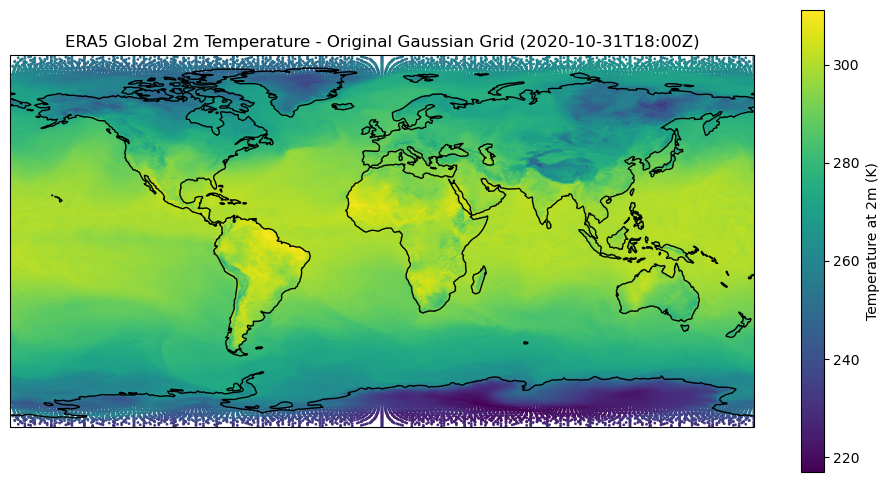

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
scatter = plt.scatter(
    recent_an.longitude,
    recent_an.latitude,
    c=recent_an.t2m.sel(time='2020-10-31T18').values,
    s=1
)
plt.colorbar(scatter, label='Temperature at 2m (K)')
ax.coastlines()
plt.title('ERA5 Global 2m Temperature - Original Gaussian Grid (2020-10-31T18:00Z)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

/Users/vijayramaraju/anaconda3/envs/era5-docs/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


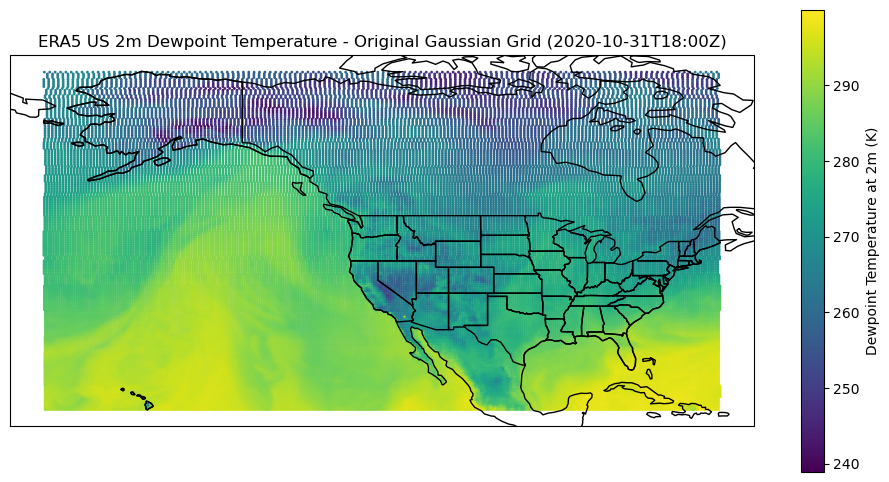

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
scatter = plt.scatter(
    US_ds.longitude,
    US_ds.latitude,
    c=US_ds.d2m.sel(time='2020-10-31T18').values,
    s=1,
    cmap='viridis'
)
plt.colorbar(scatter, label='Dewpoint Temperature at 2m (K)')
ax.coastlines()
ax.add_feature(cfeature.STATES)
plt.title('ERA5 US 2m Dewpoint Temperature - Original Gaussian Grid (2020-10-31T18:00Z)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## Regridding

_credit: [shoyer@](https://github.com/shoyer)_

From the gaussian representation, we have many choices to regrid and interpolate the data. In this example, we will regrid with linear interpolation on a triangular mesh using `scipy.spatial.Delaunay` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html)).

> **WARNING:** The regridding process may take a significant amount of time, especially for large datasets. The operations below can take several minutes to complete depending on your hardware. Please be patient during the execution of these cells.



In [11]:
import xarray as xr
import scipy.spatial
import numpy as np

def mirror_point_at_360(ds):
  extra_point = (
      ds.where(ds.longitude == 0, drop=True)
      .assign_coords(longitude=lambda x: x.longitude + 360)
  )
  return xr.concat([ds, extra_point], dim='values')

def build_triangulation(x, y):
  grid = np.stack([x, y], axis=1)
  return scipy.spatial.Delaunay(grid)

def interpolate(data, tri, mesh):
  indices = tri.find_simplex(mesh)
  ndim = tri.transform.shape[-1]
  T_inv = tri.transform[indices, :ndim, :]
  r = tri.transform[indices, ndim, :]
  c = np.einsum('...ij,...j', T_inv, mesh - r)
  c = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)
  result = np.einsum('...i,...i', data[:, tri.simplices[indices]], c)
  return np.where(indices == -1, np.nan, result)

In [12]:
%time ds_feb20 = reanalysis.sel(time=slice('2020-02-01', '2020-02-28')).pipe(mirror_point_at_360)

CPU times: user 195 ms, sys: 23 ms, total: 218 ms
Wall time: 1.48 s


In [13]:
%time tri = build_triangulation(ds_feb20.longitude, ds_feb20.latitude)

CPU times: user 4.41 s, sys: 393 ms, total: 4.8 s
Wall time: 8.04 s


### Visualizing the mesh

We're using a naive 2D mesh in latitude/longitude mesh, which results in a strange triangulation near the poles. A better approach would be to use a [stereographic projection](https://www.redblobgames.com/x/1842-delaunay-voronoi-sphere/).

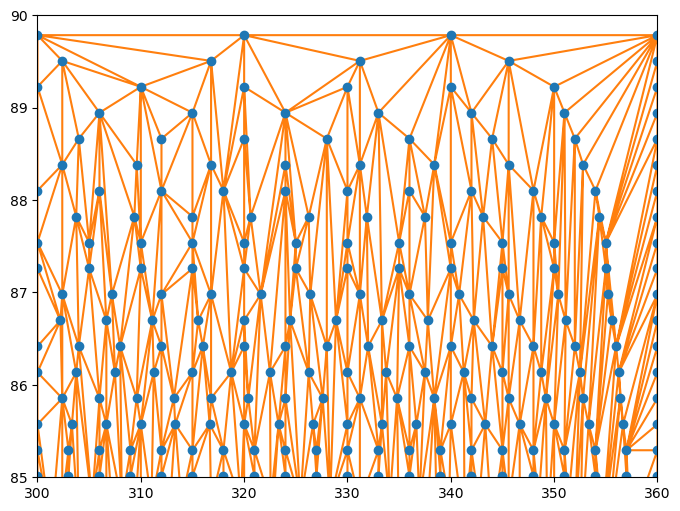

In [14]:
# near the north pole
scipy.spatial.delaunay_plot_2d(tri);
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xlim(300, 360)
_ = plt.ylim(85, 90)

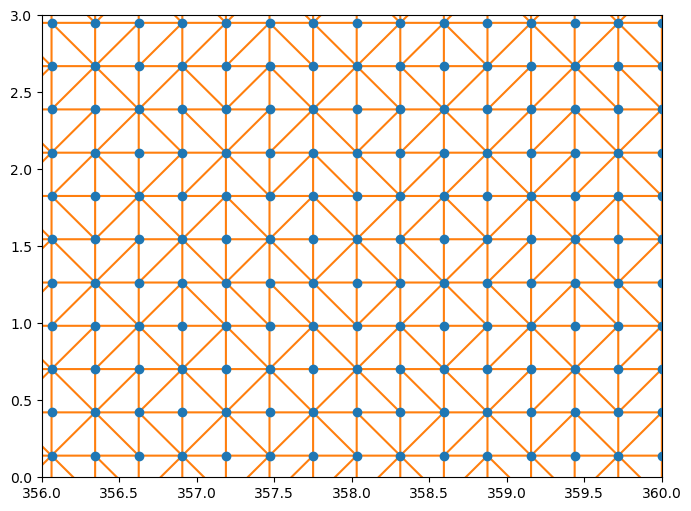

In [15]:
# near the equator
scipy.spatial.delaunay_plot_2d(tri);
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xlim(356, 360)
_ = plt.ylim(0, 3)

### Regrid fields

1/4 of a degree is approximately native resolution for ERA5.

In [16]:
longitude = np.linspace(0, 360, num=360*4+1)
latitude = np.linspace(-90, 90, num=180*4+1)
mesh = np.stack(np.meshgrid(longitude, latitude, indexing='ij'), axis=-1)
%time d2m_mesh = interpolate(ds_feb20.d2m.values, tri, mesh)
d2m_feb20 = xr.DataArray(d2m_mesh, coords=[('time', ds_feb20.time.data), ('longitude', longitude), ('latitude', latitude)])

CPU times: user 24.1 s, sys: 49.5 s, total: 1min 13s
Wall time: 6min 15s


Now that the data has been regridded, we can index and plot with standard Xarray operations...

> Notice that plotting is faster.

Text(0, 0.5, 'Latitude')

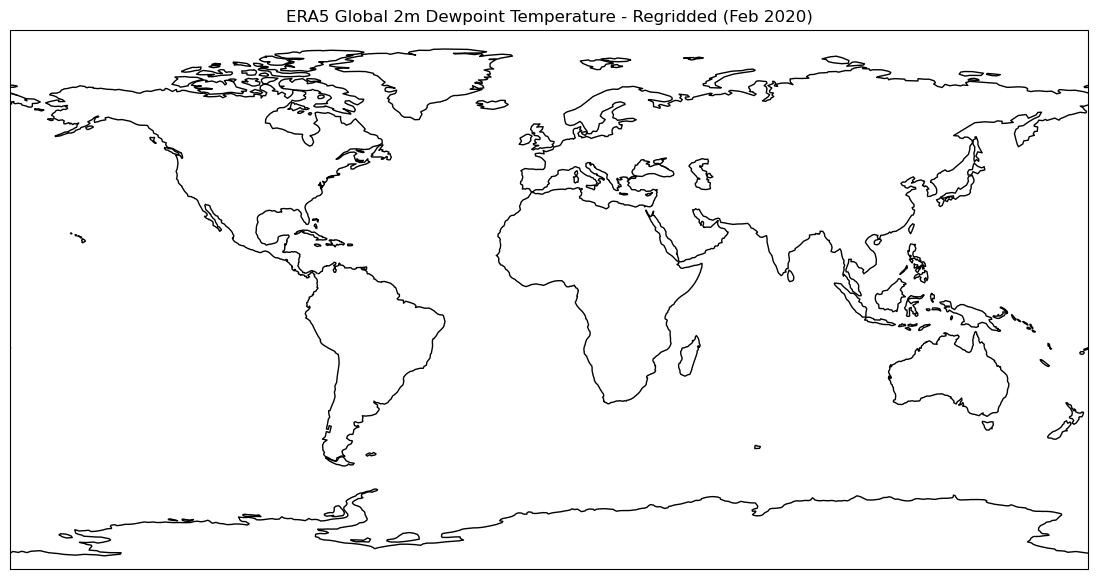

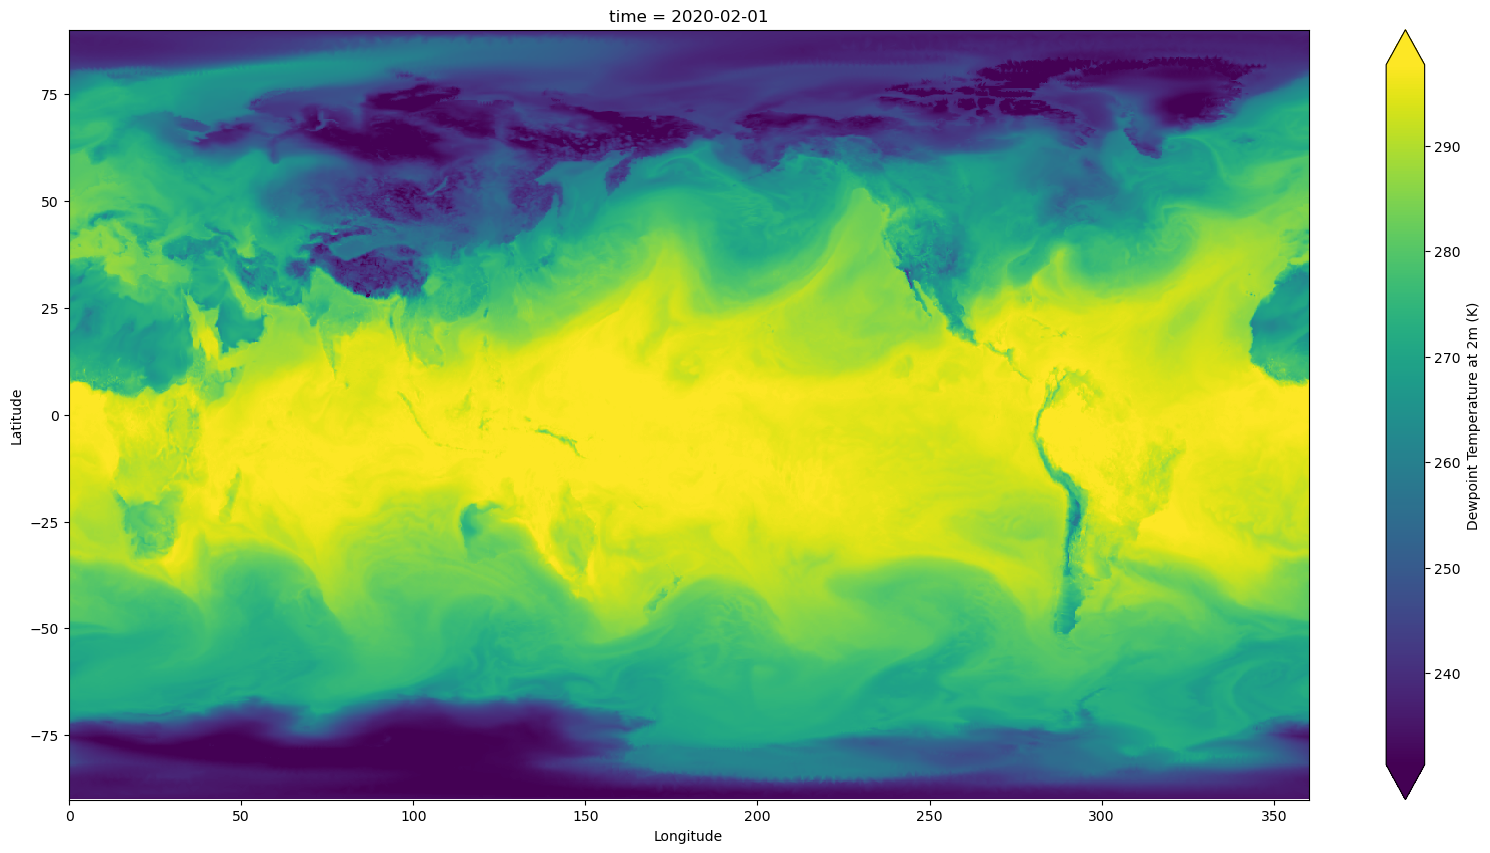

In [17]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(projection=ccrs.PlateCarree())
p = d2m_feb20[0].plot(x='longitude', y='latitude', cmap='viridis', 
                      size=10, aspect=2, add_colorbar=True, 
                      robust=True, cbar_kwargs={'label': 'Dewpoint Temperature at 2m (K)'})
ax.coastlines()
ax.set_title('ERA5 Global 2m Dewpoint Temperature - Regridded (Feb 2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

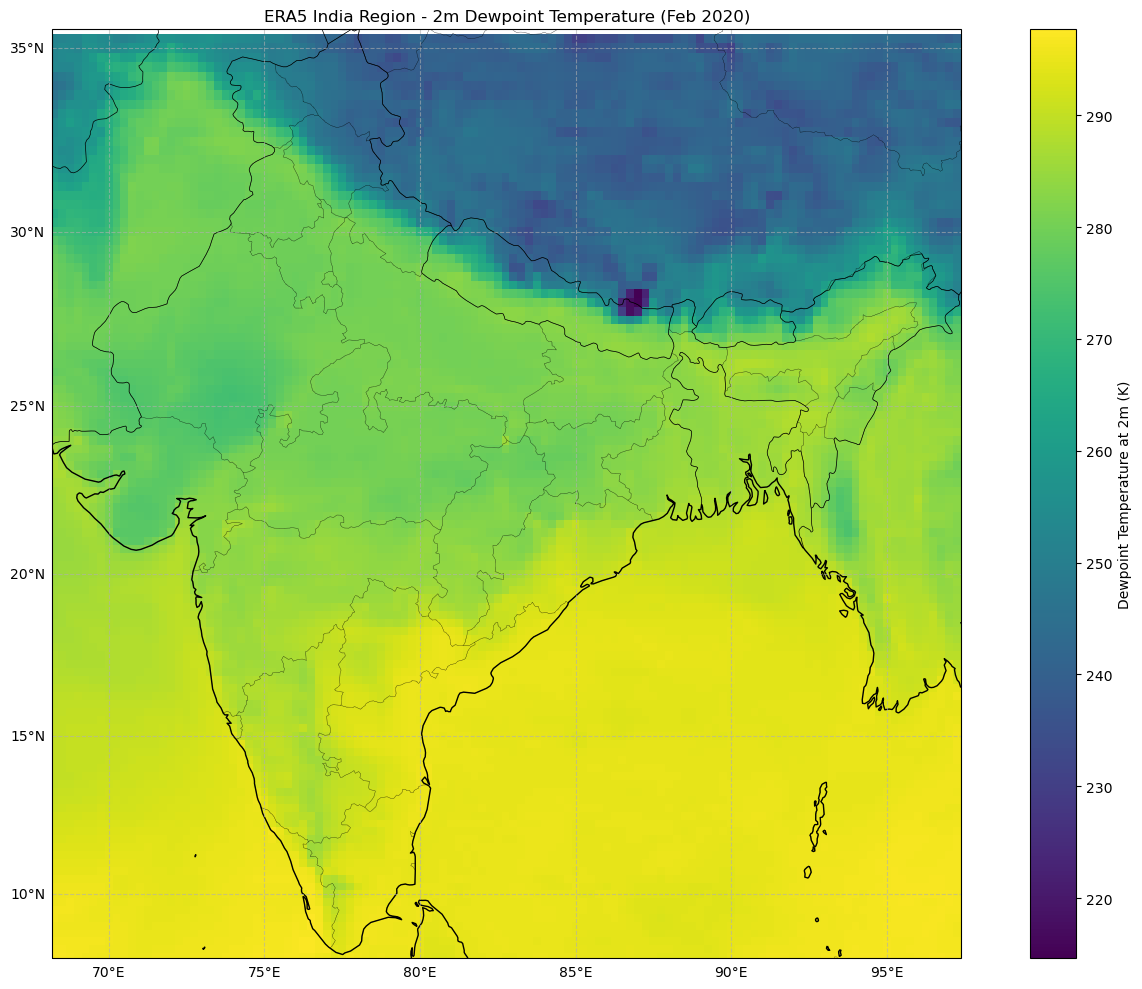

In [22]:
# Zoom into India... 
# W: 68.1766451354, S: 7.96553477623, E: 97.4025614766, N: 35.4940095078
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

plt.figure(figsize=(14, 10))

# Create a proper India-focused projection
projection = ccrs.Mercator(
    central_longitude=80,  # Central longitude for India
    min_latitude=7.965, 
    max_latitude=35.494
)

# Create the plot with a GeoAxes
ax = plt.axes(projection=projection)  # This creates a GeoAxes instead of regular Axes

# Select data for India region
india_data = (
    d2m_feb20
    .sel(latitude=slice(7.965, 35.494), longitude=slice(lon_to_360(68.176), lon_to_360(97.402)))
    .isel(time=0)
)

# Create meshgrid for pcolormesh
lons = india_data.longitude.values
lats = india_data.latitude.values
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

# Plot the data with proper coordinate transformation
p = ax.pcolormesh(
    lon_mesh, 
    lat_mesh,
    india_data.values.T,  # Transpose the data to match the meshgrid dimensions
    transform=ccrs.PlateCarree(),  # Source coordinate system
    cmap='viridis',
    shading='auto',  # Let matplotlib determine appropriate shading
)

# Add colorbar
cbar = plt.colorbar(p, ax=ax, label='Dewpoint Temperature at 2m (K)')

# Add detailed coastlines and other features
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.3, linestyle=':')

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.6)
gl.top_labels = False  # Don't show labels at the top
gl.right_labels = False  # Don't show labels on the right

# Set extent to India region
ax.set_extent([68.176, 97.402, 7.965, 35.494], crs=ccrs.PlateCarree())

plt.title('ERA5 India Region - 2m Dewpoint Temperature (Feb 2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

## Integrating with MetView

Often, instead of rolling our own interpolation and analysis, we'd rather use something more standard. How does ECMWF do it's regridding, for example? Luckily for us, ECMWF provides a rich analysis & plotting library called MetView ([metview.readthedocs.io](https://metview.readthedocs.io/)).  Here, the institution includes the same routines for interpolation that they use in Copernicus. The only limitation is that we have to convert our cloud-optimized dataset back to grib.


In [23]:
import xarray as xr
import metview as mv

# Reload the data, in case it hasn't been loaded above
reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr', 
    chunks={'time': 48},
    consolidated=True,
)

python(61116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [24]:
# Convert a slice of the data to grib on your local filesystem.
ds_single = reanalysis.sel(time=slice("1999-05-03T21","1999-05-03T21"))
single_fieldset = mv.dataset_to_fieldset(ds_single.squeeze())

/Users/vijayramaraju/anaconda3/envs/era5-docs/lib/python3.9/site-packages/cfgrib/xarray_to_grib.py:252: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'stepUnits:int' to 1
failed t

In [25]:
single_fieldset.describe()

In [26]:
# Compute other derived variables, such as wind speed
u_wind = single_fieldset.select(shortName='100u')
v_wind = single_fieldset.select(shortName='100v')
speed100 = mv.speed(u_wind,v_wind)
u_wind = single_fieldset.select(shortName='10u')
v_wind = single_fieldset.select(shortName='10v')
speed10 = mv.speed(u_wind,v_wind)
speed = mv.merge(speed10,speed100)
single_fieldset = mv.merge(single_fieldset, speed)

In [27]:
def roll_longitude(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [28]:
# Regrid our dataset to lat/long coordinates (at 0.25° x 0.25°).
single_ll = mv.read(data=single_fieldset, grid=[0.25,0.25])

ds_single_ll = single_ll.to_dataset()
ds_single_ll = roll_longitude(ds_single_ll)
ds_single_ll

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    valid_time  datetime64[ns] ...
Data variables: (12/40)
    cape        (latitude, longitude) float32 ...
    d2m         (latitude, longitude) float32 ...
    hcc         (latitude, longitude) float32 ...
    istl1       (latitude, longitude) float32 ...
    istl2       (latitude, longitude) float32 ...
    istl3       (latitude, longitude) float32 ...
    ...          ...
    u100        (latitude, longitude) float32 ...
    v10         (latitude, longitude) float32 ...
    v100        (latitude, longitude) float32 ...
    z           (latitude, longitude) float32 ...
    si10        (latitude, longitude) float32 ...
    si100       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-28T11:26 GRIB to CDM+CF via cfgrib-0.9.1...

/Users/vijayramaraju/anaconda3/envs/era5-docs/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


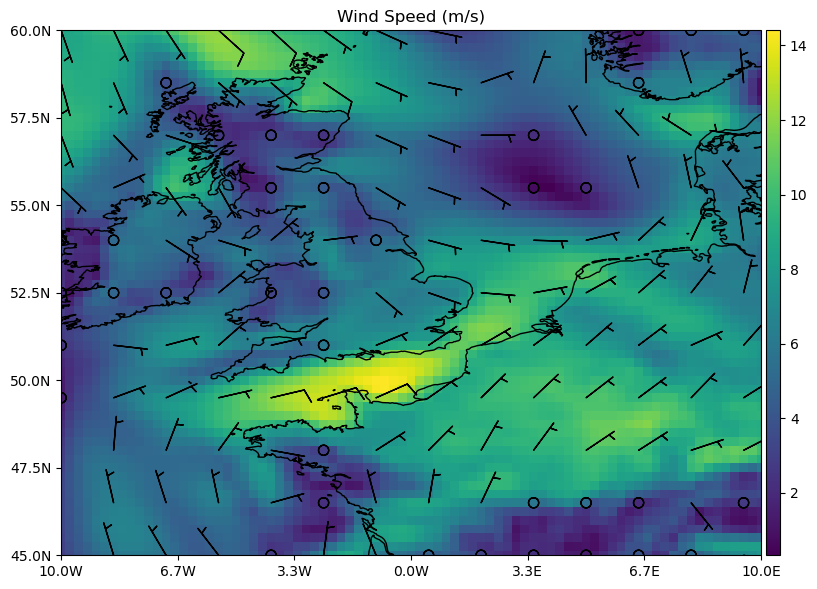

In [29]:
from util import plot_shaded_with_barbs

plot_ds = ds_single_ll.sel(longitude=slice(-10,10),latitude=slice(60,45))
plot_shaded_with_barbs(plot_ds,shading_variable="si100",barb_skip=6)

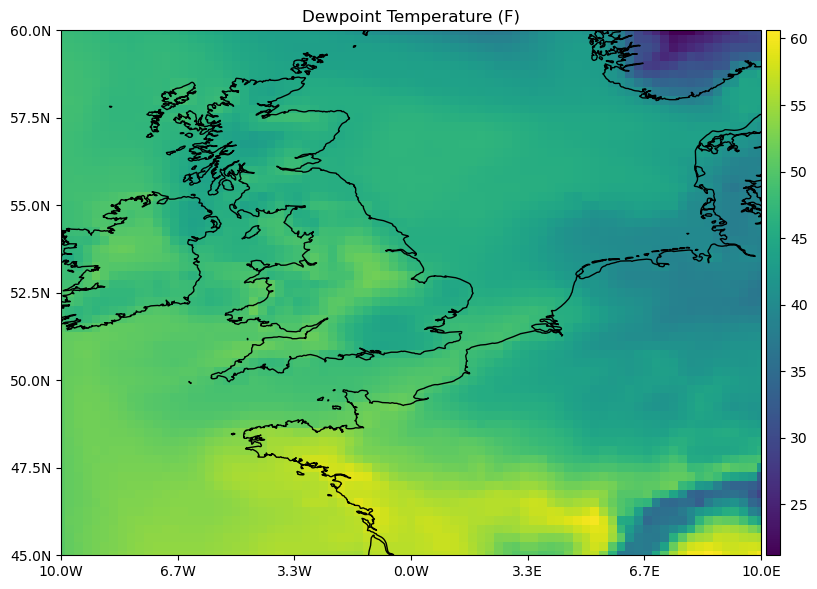

In [30]:
plot_shaded_with_barbs(
    plot_ds,
    shading_variable='d2m',
    plot_wind_barbs=False,
    scalevar=1.8,
    add_offset=-459.67,
    label='Dewpoint Temperature (F)'
)

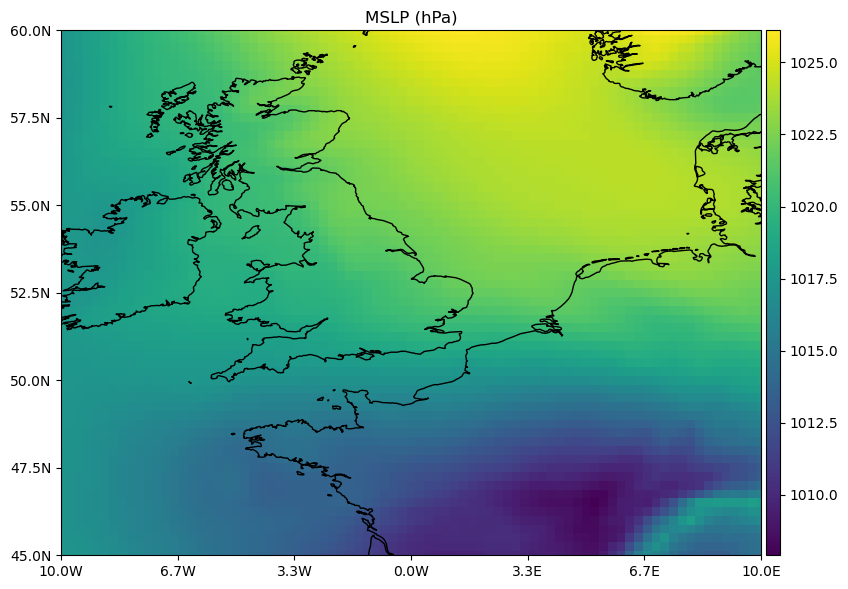

In [31]:
plot_shaded_with_barbs(
    plot_ds,
    shading_variable='msl',
    plot_wind_barbs=False,
    scalevar=1.E-2,
    label='MSLP (hPa)'
)

In [32]:
plot_ds_global = ds_single_ll.sel(latitude=slice(45,30),longitude=slice(-105,-95))

/Users/vijayramaraju/anaconda3/envs/era5-docs/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/vijayramaraju/anaconda3/envs/era5-docs/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


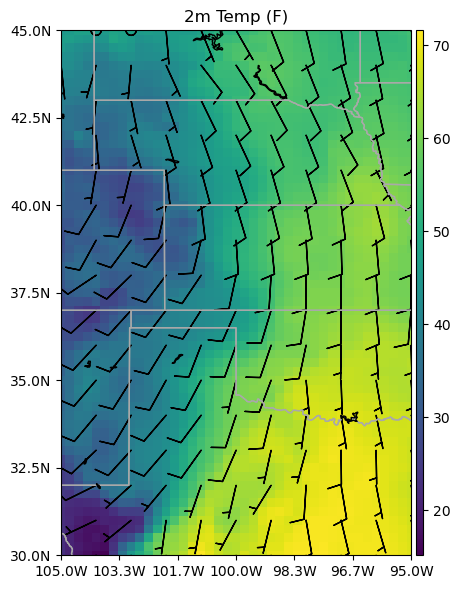

In [33]:
plot_shaded_with_barbs(
    plot_ds_global,
    shading_variable='d2m',
    plot_wind_barbs=True,
    scalevar=1.8,
    add_offset=-459.67,
    label="2m Temp (F)",
    lakes=True,
    states=True,
    counties=False
)

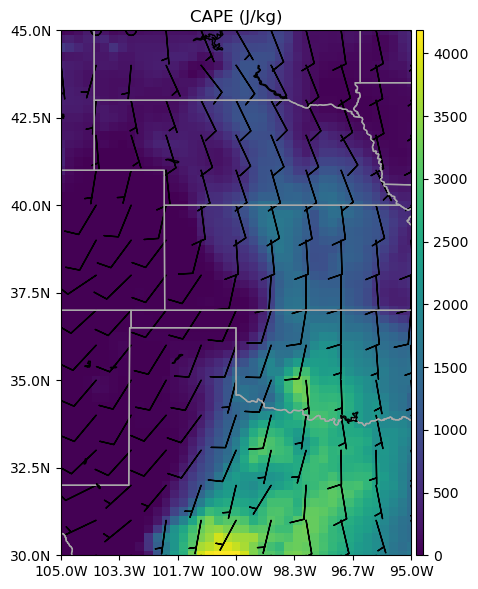

In [34]:
plot_shaded_with_barbs(
    plot_ds_global,
    shading_variable='cape',
    plot_wind_barbs=True,
    scalevar=1.E-0,
    label="CAPE (J/kg)",
    lakes=True,
    states=True,
    counties=False
)

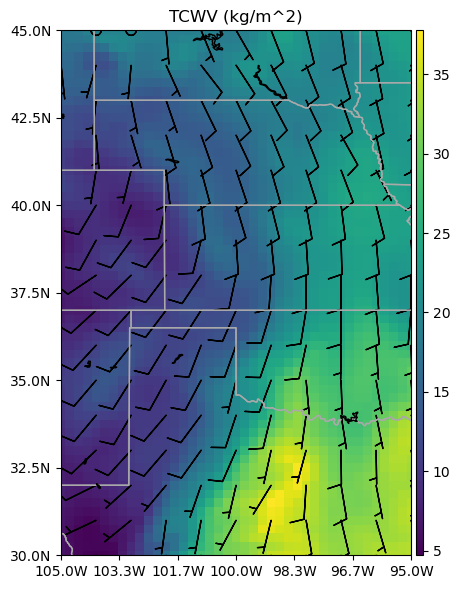

In [35]:
plot_shaded_with_barbs(
    plot_ds_global,
    shading_variable='tcwv',
    plot_wind_barbs=True,
    scalevar=1.E-0,
    label="TCWV (kg/m^2)",
    lakes=True,
    states=True,
    counties=False
)

## Preview: Other cloud-optimized datasets

Beyond the surface level reanalysis, we've also made a few other datasets available. You can see previews of each of these in the next section. Stay tuned – we're actively developing demo notebooks.

### Surface forecasts

In [36]:
import xarray as xr

forecasts = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/co/single-level-forecast.zarr/', 
    chunks={'time': 48},
    consolidated=True,
)

In [37]:
print(f'size: {forecasts.nbytes / (1024 ** 4)} TiB')

size: 24.524807091955154 TiB


In [38]:
forecasts

<xarray.Dataset>
Dimensions:     (time: 31168, step: 19, values: 542080)
Coordinates:
    latitude    (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude   (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    number      int64 ...
  * step        (step) timedelta64[ns] 00:00:00 01:00:00 ... 17:00:00 18:00:00
    surface     float64 ...
  * time        (time) datetime64[ns] 1979-01-01T06:00:00 ... 2021-08-31T18:0...
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(48, 19), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/21)
    cp          (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    crr         (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    csf         (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    csfr        (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    es          (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    gwd         (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    ...          ...
    smlt        (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    ssrd        (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    str         (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    strd        (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    tp          (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
    ttr         (time, step, values) float32 dask.array<chunksize=(48, 19, 542080), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-27T00:23 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  011ff1003a2ecdbcbd5c5ecc9c0a2b53a2a3056863d691...
    pangeo-forge:recipe_hash:  79422b41ca015cbc01df0929ac7bea8c7927f70e2c1e53...
    pangeo-forge:version:      0.9.1

### Atmospheric data: Model level data

See the [Model Levels Walkthrough](1-Model-Levels-Walkthrough.ipynb) for an in-depth look at these datasets...


In [39]:
import xarray as xr

ml_moisture = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/co/model-level-moisture.zarr', 
    chunks={'time': 48},
    consolidated=True,
)

In [40]:
print(f'{ml_moisture.nbytes / (1024 ** 4)} TiB')

707.3467227025685 TiB


In [41]:
ml_moisture

<xarray.Dataset>
Dimensions:     (time: 374016, hybrid: 137, values: 542080)
Coordinates:
  * hybrid      (hybrid) float64 1.0 2.0 3.0 4.0 5.0 ... 134.0 135.0 136.0 137.0
    latitude    (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude   (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    step        timedelta64[ns] ...
  * time        (time) datetime64[ns] 1979-01-01 ... 2021-08-31T23:00:00
    valid_time  (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables:
    cc          (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 542080), meta=np.ndarray>
    ciwc        (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 542080), meta=np.ndarray>
    clwc        (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 542080), meta=np.ndarray>
    crwc        (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 542080), meta=np.ndarray>
    cswc        (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 542080), meta=np.ndarray>
    o3          (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 542080), meta=np.ndarray>
    q           (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 542080), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              2
    GRIB_subCentre:            0
    history:                   2022-09-27T00:00 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  06482fd143803f9b1ae4d85151c399e57173179ee57bcf...
    pangeo-forge:recipe_hash:  7af5b330ea42d563af5c8b6d2606cb839306f90d83bfd2...
    pangeo-forge:version:      0.9.1

In [42]:
import xarray as xr

ml_wind = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/co/model-level-wind.zarr', 
    chunks={'time': 48},
    consolidated=True,
)

In [43]:
print(f'{ml_wind.nbytes / (1024 ** 4)} TiB')

305.8925611573068 TiB


In [44]:
ml_wind

<xarray.Dataset>
Dimensions:     (time: 374016, hybrid: 137, values: 410240)
Coordinates:
  * hybrid      (hybrid) float64 1.0 2.0 3.0 4.0 5.0 ... 134.0 135.0 136.0 137.0
    step        timedelta64[ns] ...
  * time        (time) datetime64[ns] 1979-01-01 ... 2021-08-31T23:00:00
    valid_time  (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables:
    d           (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 410240), meta=np.ndarray>
    t           (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 410240), meta=np.ndarray>
    vo          (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 410240), meta=np.ndarray>
    w           (time, hybrid, values) float32 dask.array<chunksize=(48, 137, 410240), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              2
    GRIB_subCentre:            0
    history:                   2022-10-09T17:47 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  7db2d90013176f19f18ca7aa85222a2c796c298afe6e44...
    pangeo-forge:recipe_hash:  ed5fbf407898def1e27d4e8965c2cdaa01b7ea8f2ac2e1...
    pangeo-forge:version:      0.9.1

## Looking ahead... 

These cloud-optimized datasets are much easier to work with than raw grib data. The unprocessed spectral representation yields full control over projection and interpolation details to the user. We expect that this version of the data will be helpful for many research use cases. 

At the same time, we anticipate that many users will want common preprocessing applied. In the next phase of development, our team in Research will work towards curating this corpus into an "Analysis Ready" version. Here, we will make practical, opinionated choices towards making ERA5 accessible and useful.

### Summary of Key Concepts

- **ERA5 Data Format**: The data is stored in Zarr format, which allows for efficient cloud-based access
- **Gaussian Grid**: ERA5 uses a reduced Gaussian grid (N320) that varies in resolution with latitude
- **Regridding Options**: We've demonstrated both custom regridding and MetView-based approaches
- **Data Access**: Accessing the data requires GCP authentication and uses Xarray with chunking for efficient processing

Stay tuned to [our roadmap](https://github.com/google-research/arco-era5#roadmap) to follow this development. Or, if you have feedback over how the data should be structured, please say so in a Github issue.

Thanks for following this notebook!